<a href="https://colab.research.google.com/github/Rukaya-lab/Project-/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

""" Which actor has been mostly showed up in US Netflix Movie or TV Show?
Which Country has made most Movie or TV Show?
Get the percentage of genre
Visualize how many Movie and TV Show has showed in each decade
Understanding what content is available in different countries
Is Netflix has increasingly focusing on TV rather than movies in recent years?"""

In [1]:
# Basic module
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Helps to visualize missing values in each columns
import missingno as msno

# Simple & Easy way to overview dataset
from pandas_profiling import ProfileReport

# Used for choosing most frequently shown country.
from collections import Counter

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [34]:
df_net = pd.read_csv('netflix_titles.csv')

In [35]:
df_net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [36]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [37]:
df_net.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

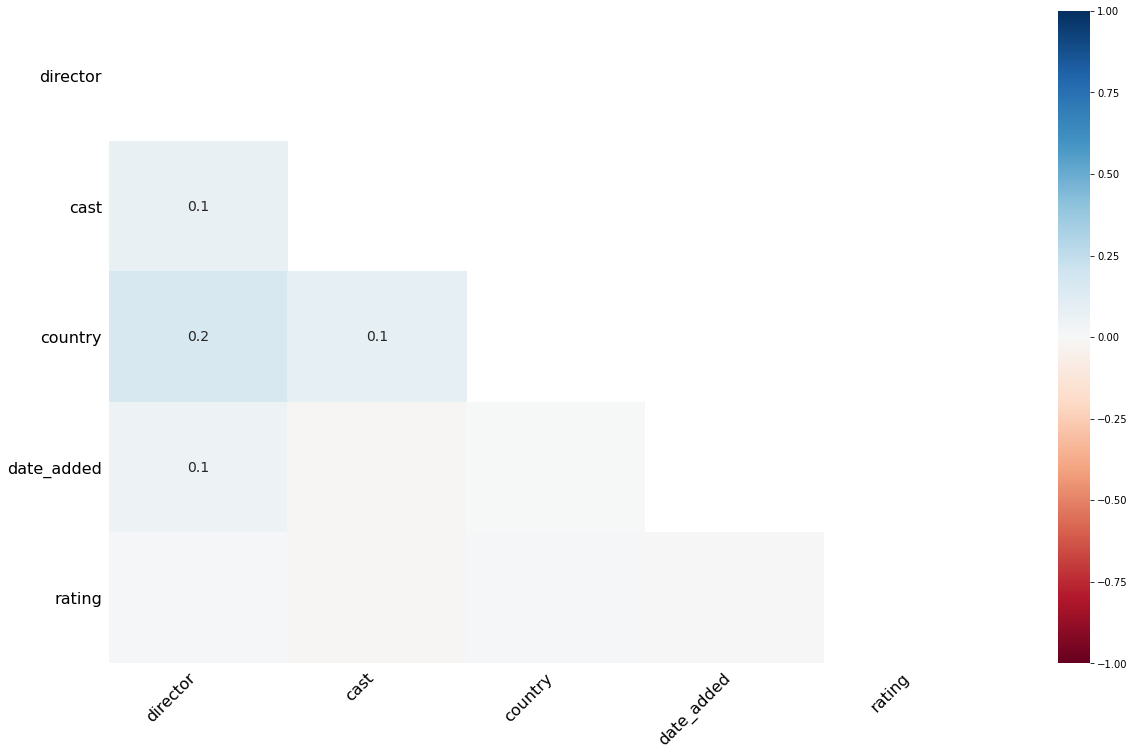

In [38]:
msno.heatmap(df_net)

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [39]:
#using profile report to get the summary statistics of the dataset
prof = ProfileReport(df_net, title='Pandas Profiling Report', explorative=True)

prof

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
#dropping columns that arent useful

df_net.drop(['director', 'date_added', 'description'], axis=1, inplace=True)

In [41]:
#ratings with null value
df_net[df_net['rating'].isnull()]

,show_id,type,title,cast,country,release_year,rating,duration,listed_in
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,"Oprah Winfrey, Ava DuVernay",NaN,2017,NaN,37 min,Movies
2359,s2360,TV Show,Gargantia on the Verdurous Planet,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2013,NaN,1 Season,"Anime Series, International TV Shows"
3660,s3661,TV Show,Little Lunch,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2015,NaN,1 Season,"Kids' TV, TV Comedies"
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,United States,2017,NaN,74 min,Movies
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,2010,NaN,84 min,Movies
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,2015,NaN,66 min,Movies
4323,s4324,Movie,My Honor Was Loyalty,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2015,NaN,115 min,Dramas


In [42]:
changing_nan = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in changing_nan.items():
    df_net.iloc[id, 6] = rate
    
df_net['rating'].isnull().sum()

0

In [43]:
df_net= df_net[df_net['cast'].notna()]

df_net['cast'].isnull().sum()

0

In [44]:
# united states has the highest count in county, we can fill the missing values in that column with USA

df_net['country'] = df_net['country'].fillna('United States')
df_net['country'].isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [45]:
df_net.isnull().sum().sum()

0

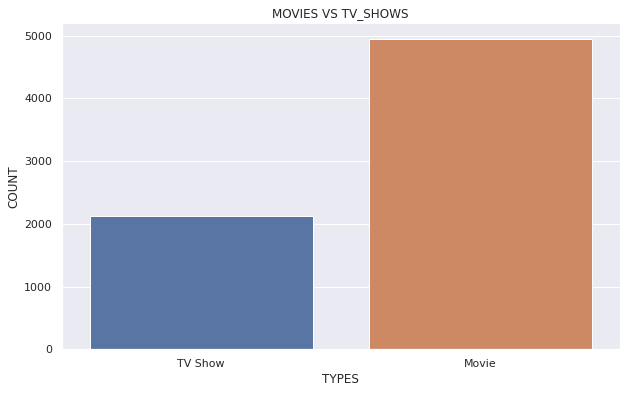

In [46]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='type', data=df_net)
plt.title('MOVIES VS TV_SHOWS')
plt.xlabel('TYPES')
plt.ylabel('COUNT')
plt.show()

In [47]:
df_tv = df_net[df_net["type"] == "TV Show"]
df_movie = df_net[df_net["type"] == "Movie"]

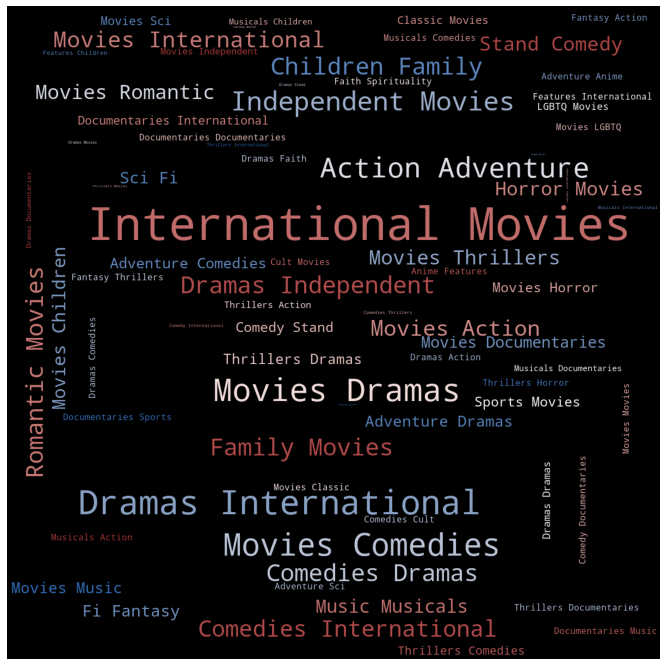

In [48]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movie['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

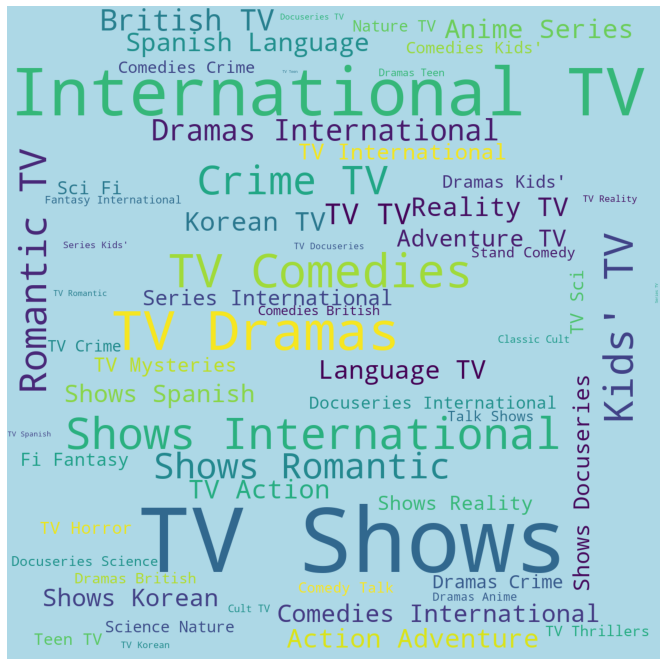

In [49]:
text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightblue', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()